# **Preprocessing**

In [0]:
import json
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
barbellsreviews = json.load(open('drive/My Drive/Colab Notebooks/APRD6343_NEW/adidasreviews2.json','r'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
barbellstext = []
for areview in barbellsreviews:
  areview = barbellsreviews[areview]
  if 'reviewText' in areview:
    barbellstext.append(areview['reviewText'])

# convert review texts to dictionary
barbellsdict = dict(zip(range(len(barbellstext)), barbellstext))

In [0]:
! pip install tmtoolkit

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

     |████████████████████████████████| 19.9MB 222kB/s 
     |████████████████████████████████| 1.5MB 35.6MB/s 
     |████████████████████████████████| 2.3MB 36.9MB/s 
     |████████████████████████████████| 112kB 48.8MB/s 
     |████████████████████████████████| 22.1MB 72.1MB/s 
     |████████████████████████████████| 3.0MB 29.9MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449906 sha256=d1cc27f7504a02a1c9c1ba6503cf590b2e14cf34c6953b15803f490d1b093ff2
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
  Created wheel for globre: filename=globre-0.1.5-cp36-none-any.whl size=19528 sha256=358e0330a71179b036e81b95f170e2ca1e47da47bbc03346afb5cfc1676f5ead
  Stored in directory: /root/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
Successfully built nltk globre
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
  Fou

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import random
random.seed(20191120) # to make the sampling reproducible
np.set_printoptions(precision=5)
from tmtoolkit.corpus import Corpus
corpus = Corpus()

# add documents to corpus
for key in barbellsdict:
  corpus.add_doc(str(key), barbellsdict[key])

In [0]:
print(len(corpus))
corpus.doc_labels
corpus['91']

27081


'comfy shoe for casual wear on sore feet. but I do recommend wearing socks as the massage points can hurt a lot if you have soft feet (as i do). Also, this was the best price I had ever seen for these and it was a dramatic difference'

(array([2.6547e+04, 4.7900e+02, 3.9000e+01, 1.1000e+01, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  1024.1,  2048.2,  3072.3,  4096.4,  5120.5,  6144.6,
         7168.7,  8192.8,  9216.9, 10241. ]),
 <a list of 10 Patch objects>)

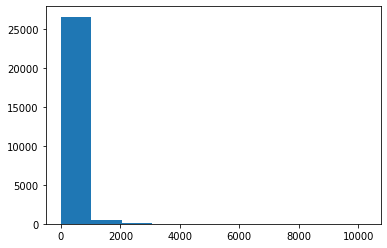

In [0]:
import matplotlib
matplotlib.pyplot.hist(corpus.doc_lengths.values()) 

In [0]:
# https://tmtoolkit.readthedocs.io/en/latest/preprocessing.html
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus)
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http','nt'])

<TMPreproc [27081 documents]>

In [0]:
corpus['91']

'comfy shoe for casual wear on sore feet. but I do recommend wearing socks as the massage points can hurt a lot if you have soft feet (as i do). Also, this was the best price I had ever seen for these and it was a dramatic difference'

In [0]:
preproc.tokens['91']

['comfy',
 'shoe',
 'for',
 'casual',
 'wear',
 'on',
 'sore',
 'foot',
 '',
 'but',
 'i',
 'do',
 'recommend',
 'wear',
 'sock',
 'as',
 'the',
 'massage',
 'point',
 'can',
 'hurt',
 'a',
 'lot',
 'if',
 'you',
 'have',
 'soft',
 'foot',
 '',
 'as',
 'i',
 'do',
 '',
 '',
 'also',
 '',
 'this',
 'be',
 'the',
 'best',
 'price',
 'i',
 'have',
 'ever',
 'see',
 'for',
 'these',
 'and',
 'it',
 'be',
 'a',
 'dramatic',
 'difference']

In [0]:
preproc.vocabulary_size

28950

In [0]:
#preproc.stem()

In [0]:
preproc.tokens['91']

['comfy',
 'shoe',
 'for',
 'casual',
 'wear',
 'on',
 'sore',
 'foot',
 '',
 'but',
 'i',
 'do',
 'recommend',
 'wear',
 'sock',
 'as',
 'the',
 'massage',
 'point',
 'can',
 'hurt',
 'a',
 'lot',
 'if',
 'you',
 'have',
 'soft',
 'foot',
 '',
 'as',
 'i',
 'do',
 '',
 '',
 'also',
 '',
 'this',
 'be',
 'the',
 'best',
 'price',
 'i',
 'have',
 'ever',
 'see',
 'for',
 'these',
 'and',
 'it',
 'be',
 'a',
 'dramatic',
 'difference']

In [0]:
preproc.tokens_datatable

,doc,position,token,meta_pos
0,0,0,a,DT
1,0,1,great,JJ
2,0,2,shoe,NN
3,0,3,,.
4,0,4,does,VBZ
...,...,...,...,...
20,9999,20,i,PRP
21,9999,21,d,MD
22,9999,22,recommend,VB
23,9999,23,it,PRP


In [0]:
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N')
preproc_smaller.clean_tokens(remove_numbers = True, remove_shorter_than = 2)
preproc_smaller.remove_common_tokens(df_threshold = 1)
#preproc_smaller.remove_uncommon_tokens(df_threshold = 0.005)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

28950
18303


In [0]:
preproc_smaller.tokens_dataframe

token meta_pos
doc  position                 
0    0           shoe       NN
     1            lot       NN
     2         really      NNP
     3          style       NN
1    0           pair      NNS
...               ...      ...
9998 5          floor      NNS
     6         killer       NN
     7          floor      NNS
9999 0          water       NN
     1          proof       NN

[289349 rows x 2 columns]

token meta_pos
doc  position                 
0    0           shoe       NN
     1            lot       NN
     2         really      NNP
     3          style       NN
1    0           pair      NNS
...               ...      ...
9998 5          floor      NNS
     6         killer       NN
     7          floor      NNS
9999 0          water       NN
     1          proof       NN

[289349 rows x 2 columns]

In [0]:
print(preproc.tokens['91'])
print(preproc_smaller.tokens['91'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['2000'])
print(preproc_smaller.tokens['2000'])

['comfy', 'shoe', 'for', 'casual', 'wear', 'on', 'sore', 'foot', '', 'but', 'i', 'do', 'recommend', 'wear', 'sock', 'as', 'the', 'massage', 'point', 'can', 'hurt', 'a', 'lot', 'if', 'you', 'have', 'soft', 'foot', '', 'as', 'i', 'do', '', '', 'also', '', 'this', 'be', 'the', 'best', 'price', 'i', 'have', 'ever', 'see', 'for', 'these', 'and', 'it', 'be', 'a', 'dramatic', 'difference']
['comfy', 'shoe', 'wear', 'sore', 'foot', 'sock', 'massage', 'point', 'lot', 'foot', 'price', 'difference']
['i', 'have', '4', 'pair', 'of', 'these', 'shoe', 'and', 'i', 'love', 'them', 'to', 'death', '', 'they', 'be', 'as', 'close', 'to', 'indestructable', 'as', 'any', 'shoe', 'i', 've', 'ever', 'own', '', 'then', 'you', 're', 'probably', 'ask', 'why', 'i', 'have', 'so', 'many', '', 'well', '', 'the', 'answer', 'be', 'that', 'this', 'be', 'the', 'only', 'shoe', 'i', 'know', 'of', 'that', 'come', 'in', 'so', 'many', 'color', '', 'i', 've', 'see', 'at', 'least', '7', 'or', '8', 'color', '', 'and', 'work', 'w

In [0]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003',
       '10004'], dtype='<U5')

In [0]:
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary)

In [0]:
dtm_bg = preproc.dtm # dtm - document term matrix
dtm_sm = preproc_smaller.dtm

dtm_bg, dtm_sm

(<27081x28950 sparse matrix of type '<class 'numpy.int32'>'
 	with 1018872 stored elements in Compressed Sparse Row format>,
 <27081x18303 sparse matrix of type '<class 'numpy.int32'>'
 	with 246482 stored elements in Compressed Sparse Row format>)

# **Creating Models**

In [0]:
!pip install tmtoolkit['lda']
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

In [0]:
# suppress the "INFO" messages and warnings from Ida
logger = logging.getLogger('lda')
#logger.addHandler(logging.NullHandler())
logger.addHandler(logging.NullHandler())
logger.propagate = False

warnings.filterwarnings('ignore')

# set data to use
dtms = {
    'bigger': dtm_bg,
    'smaller': dtm_sm
}

# and fixed hyperparameters
lda_params = {
    'n_topics': 51,
    'eta': .01,  #beta parameter
    'n_iter': 1000,
    'random_state': 20191122  #to make resutls reproducible
}


In [0]:
models = compute_models_parallel(dtms, constant_parameters=lda_params)

In [0]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n = 5)

topic_1
> #1. pair (0.316686)
> #2. year (0.125191)
> #3. one (0.067658)
> #4. time (0.039988)
> #5. adidas (0.028009)
topic_2
> #1. size (0.435709)
> #2. order (0.086319)
> #3. shoe (0.073605)
> #4. half (0.055696)
> #5. review (0.044056)
topic_3
> #1. son (0.153636)
> #2. year (0.081660)
> #3. daughter (0.055537)
> #4. kid (0.051335)
> #5. school (0.050422)
topic_4
> #1. bag (0.149466)
> #2. pocket (0.067312)
> #3. gym (0.044300)
> #4. backpack (0.033369)
> #5. water (0.028421)
topic_5
> #1. pant (0.223038)
> #2. size (0.038770)
> #3. leg (0.036696)
> #4. length (0.036058)
> #5. medium (0.031750)
topic_6
> #1. cleat (0.109436)
> #2. soccer (0.093683)
> #3. ball (0.052289)
> #4. turf (0.034692)
> #5. leather (0.028156)
topic_7
> #1. product (0.218498)
> #2. quality (0.084600)
> #3. time (0.046344)
> #4. item (0.034315)
> #5. price (0.031357)
topic_8
> #1. shoe (0.317189)
> #2. lot (0.089389)
> #3. color (0.077379)
> #4. compliment (0.057493)
> #5. people (0.040364)
topic_9
> #1. shoe 

In [0]:
model_bg = models['bigger'][0][1]
print_ldamodel_topic_words(model_bg.topic_word_, vocab_bg, top_n = 5)

topic_1
> #1.  (0.116442)
> #2. and (0.038615)
> #3. these (0.033718)
> #4. the (0.028971)
> #5. be (0.028933)
topic_2
> #1.  (0.117040)
> #2. they (0.077651)
> #3. i (0.068137)
> #4. and (0.061623)
> #5. these (0.054530)
topic_3
> #1.  (0.168473)
> #2. and (0.085187)
> #3. be (0.076487)
> #4. they (0.066477)
> #5. fit (0.059044)
topic_4
> #1. he (0.108803)
> #2. my (0.081357)
> #3.  (0.078862)
> #4. for (0.060565)
> #5. son (0.060476)
topic_5
> #1.  (0.092383)
> #2. my (0.083529)
> #3. for (0.066001)
> #4. she (0.059741)
> #5. and (0.036936)
topic_6
> #1.  (0.113765)
> #2. it (0.060146)
> #3. shirt (0.046797)
> #4. the (0.045912)
> #5. be (0.039311)
topic_7
> #1.  (0.121449)
> #2. a (0.042392)
> #3. shoe (0.034885)
> #4. the (0.031532)
> #5. with (0.030764)
topic_8
> #1.  (0.113428)
> #2. shoe (0.088821)
> #3. the (0.064057)
> #4. golf (0.043387)
> #5. and (0.041064)
topic_9
> #1. the (0.128799)
> #2.  (0.068235)
> #3. of (0.046159)
> #4. a (0.028894)
> #5. be (0.025760)
topic_10
> #1

In [0]:
import logging
import warnings
import lda
warnings.filterwarnings('ignore')

lda_tm = lda.LDA(n_topics=51, n_iter=1000, random_state=20191122, eta=.01 )
lda_tm.fit(dtm_sm)

In [0]:
topic_word = lda_tm.topic_word_
n_top_words = 10
for i, topic_dist in enumerate(topic_word):
  topic_word = np.array(vocab_sm)[np.argsort(topic_dist)][:-n_top_words - 1:-1]
  print('Topic{}:{}'.format(i,' '.join(topic_word)))

Topic0:pair year one time adidas lot month replacement day others
Topic1:size order shoe half review fit bit others snug reviewer
Topic2:son year daughter kid school quality size month boy child
Topic3:bag pocket gym backpack water room bottle side clothes item
Topic4:pant size leg length medium fit waist way inch bit
Topic5:cleat soccer ball turf leather shoe grass field indoor game
Topic6:product quality time item price purchase excellent delivery thanks condition
Topic7:shoe lot color compliment people time look everyone style anyone
Topic8:shoe lace foot tongue time thing bit way side problem
Topic9:shirt fit material medium wash fabric size tshirt sleeve xl
Topic10:star review thing people reason way something anything issue word
Topic11:color picture blue shoe pink stripe one orange person grey
Topic12:bit material size quality adidas design look side thing part
Topic13:shoe golf course round foot spike grip fit traction hole
Topic14:month shoe wear time use week year pair day co

In [0]:
from tmtoolkit.topicmod.model_io import ldamodel_top_topic_words
tm = pd.DataFrame(ldamodel_top_topic_words(model_sm.topic_word_, vocab_sm, top_n=5)).reset_index()
tm = tm.drop(columns = 'topic')
tm.head(15)

,rank_1,rank_2,rank_3,rank_4,rank_5
0,pair (0.3167),year (0.1252),one (0.06766),time (0.03999),adidas (0.02801)
1,size (0.4357),order (0.08632),shoe (0.0736),half (0.0557),review (0.04406)
2,son (0.1536),year (0.08166),daughter (0.05554),kid (0.05134),school (0.05042)
3,bag (0.1495),pocket (0.06731),gym (0.0443),backpack (0.03337),water (0.02842)
4,pant (0.223),size (0.03877),leg (0.0367),length (0.03606),medium (0.03175)
5,cleat (0.1094),soccer (0.09368),ball (0.05229),turf (0.03469),leather (0.02816)
6,product (0.2185),quality (0.0846),time (0.04634),item (0.03431),price (0.03136)
7,shoe (0.3172),lot (0.08939),color (0.07738),compliment (0.05749),people (0.04036)
8,shoe (0.3049),lace (0.08046),foot (0.06604),tongue (0.0327),time (0.02981)
9,shirt (0.2039),fit (0.03136),material (0.03006),medium (0.0247),wash (0.0247)


In [0]:
import re
barbellstopics = ''
for i in range(len(tm)):
  words = list(tm.iloc[i,:])
  aline = str(i)+': '+' '.join([re.sub(r'\s\(.*?\)','', w) for w in words])
  barbellstopics += aline + '\n'

print(barbellstopics)

0: pair year one time adidas
1: size order shoe half review
2: son year daughter kid school
3: bag pocket gym backpack water
4: pant size leg length medium
5: cleat soccer ball turf leather
6: product quality time item price
7: shoe lot color compliment people
8: shoe lace foot tongue time
9: shirt fit material medium wash
10: star review thing people reason
11: color picture blue shoe pink
12: bit material size quality adidas
13: shoe golf course round foot
14: month shoe wear time use
15: short brief boxer material fit
16: shoe mile run runner running
17: gift husband son christmas bought
18: day foot hour work week
19: price great quality product color
20: jacket weather summer day weight
21: adidas model shoe year pair
22: adidas brand quality product price
23: boot foot adidas pair fit
24: shoe foot heel toe blister
25: sock foot bottom way problem
26: shoe son pair price money
27: pair shoe adidas samba year
28: material sole toe design part
29: muy la que el para
30: color fit q

In [0]:
outputfile = open('drive/My Drive/Colab Notebooks/APRD6343_NEW//adidastopics2.txt', 'w')

outputfile.write(barbellstopics)
outputfile.close()

# **Eval**

In [0]:
const_params = {'n_iter':1000,'eta':0.1,'random_state':20191122}
ks = list(range(1,25,2))
print(ks)
varying_params = [dict(n_topics=k,alpha=1/k) for k in ks]
print(varying_params)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 3, 'alpha': 0.3333333333333333}, {'n_topics': 5, 'alpha': 0.2}, {'n_topics': 7, 'alpha': 0.14285714285714285}, {'n_topics': 9, 'alpha': 0.1111111111111111}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 13, 'alpha': 0.07692307692307693}, {'n_topics': 15, 'alpha': 0.06666666666666667}, {'n_topics': 17, 'alpha': 0.058823529411764705}, {'n_topics': 19, 'alpha': 0.05263157894736842}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 23, 'alpha': 0.043478260869565216}]


In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results= tm_lda.evaluate_topic_models(dtm_sm,
    varying_params,
    const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 796.7360855775535, 'coherence_mimno_2011': -2.6628224416905812}), (3, {'cao_juan_2009': 0.3060682804611642, 'arun_2010': 708.2926472105813, 'coherence_mimno_2011': -4.1976096118378114}), (5, {'cao_juan_2009': 0.26674065044476825, 'arun_2010': 656.8178848171871, 'coherence_mimno_2011': -2.7344757481621835}), (7, {'cao_juan_2009': 0.32544881771510403, 'arun_2010': 602.172109322805, 'coherence_mimno_2011': -2.926971897687365}), (9, {'cao_juan_2009': 0.2894893743702142, 'arun_2010': 561.6446652644756, 'coherence_mimno_2011': -2.7499020037770743}), (11, {'cao_juan_2009': 0.33007778613309907, 'arun_2010': 547.2455448964499, 'coherence_mimno_2011': -2.842792191014054}), (13, {'cao_juan_2009': 0.3210137866659002, 'arun_2010': 517.6804852931111, 'coherence_mimno_2011': -2.89831796675738}), (15, {'cao_juan_2009': 0.3041616918424231, 'arun_2010': 504.99160533723904, 'coherence_mimno_2011': -3.045412417666961}), (17, {'cao_juan_2009': 0.30092559859851575, '

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efbbeedf400>,
       dtype=object))

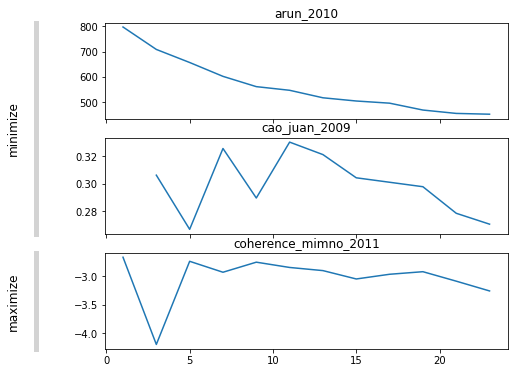

In [0]:
plot_eval_results(results_by_n_topics)

# **Eval (lower beta)**

In [0]:
const_params = {'n_iter':1000, 'eta':0.01, 'random_state':20191122}
ks = list(range(1, 25, 2))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(1*k)) for k in ks]
print(varying_params)

# no topic models will run the same every time beacuse we are sampling
# most of the documents will not have most of the topics
# lower k -- smaller proportion of share of topics in each document

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 3, 'alpha': 0.3333333333333333}, {'n_topics': 5, 'alpha': 0.2}, {'n_topics': 7, 'alpha': 0.14285714285714285}, {'n_topics': 9, 'alpha': 0.1111111111111111}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 13, 'alpha': 0.07692307692307693}, {'n_topics': 15, 'alpha': 0.06666666666666667}, {'n_topics': 17, 'alpha': 0.058823529411764705}, {'n_topics': 19, 'alpha': 0.05263157894736842}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 23, 'alpha': 0.043478260869565216}]


In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 796.091077326633, 'coherence_mimno_2011': -2.6628224416905812}), (3, {'cao_juan_2009': 0.4257530325126771, 'arun_2010': 704.0580631275859, 'coherence_mimno_2011': -3.9665593220264435}), (5, {'cao_juan_2009': 0.26127225530579845, 'arun_2010': 648.9035643468808, 'coherence_mimno_2011': -3.41328402801489}), (7, {'cao_juan_2009': 0.31463318351744946, 'arun_2010': 594.3226598239023, 'coherence_mimno_2011': -2.960633555483295}), (9, {'cao_juan_2009': 0.31019744905836677, 'arun_2010': 557.038059909632, 'coherence_mimno_2011': -2.779659370657803}), (11, {'cao_juan_2009': 0.34446813963382306, 'arun_2010': 538.0043914848021, 'coherence_mimno_2011': -2.8901440262935405}), (13, {'cao_juan_2009': 0.2906400216765566, 'arun_2010': 505.28112748815784, 'coherence_mimno_2011': -3.008443146888794}), (15, {'cao_juan_2009': 0.31540839254581765, 'arun_2010': 489.6059474200264, 'coherence_mimno_2011': -2.986054641191096}), (17, {'cao_juan_2009': 0.29960348103925694, '

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efbbeeca860>,
       dtype=object))

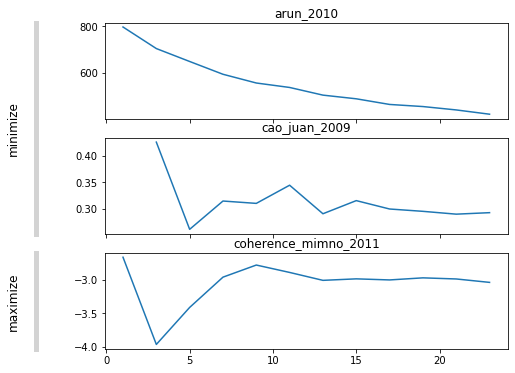

In [0]:
plot_eval_results(results_by_n_topics)

# **Eval (lower alpha)**

In [0]:
const_params = {'n_iter':1000, 'eta':0.1, 'random_state':20191122}
ks = list(range(1, 25, 2))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(10*k)) for k in ks]
print(varying_params)

# no topic models will run the same every time beacuse we are sampling
# most of the documents will not have most of the topics
# lower k -- smaller proportion of share of topics in each document

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[{'n_topics': 1, 'alpha': 0.1}, {'n_topics': 3, 'alpha': 0.03333333333333333}, {'n_topics': 5, 'alpha': 0.02}, {'n_topics': 7, 'alpha': 0.014285714285714285}, {'n_topics': 9, 'alpha': 0.011111111111111112}, {'n_topics': 11, 'alpha': 0.00909090909090909}, {'n_topics': 13, 'alpha': 0.007692307692307693}, {'n_topics': 15, 'alpha': 0.006666666666666667}, {'n_topics': 17, 'alpha': 0.0058823529411764705}, {'n_topics': 19, 'alpha': 0.005263157894736842}, {'n_topics': 21, 'alpha': 0.004761904761904762}, {'n_topics': 23, 'alpha': 0.004347826086956522}]


In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 796.7360855775535, 'coherence_mimno_2011': -2.6628224416905812}), (3, {'cao_juan_2009': 0.32215421635309655, 'arun_2010': 742.998497607197, 'coherence_mimno_2011': -5.354434178206318}), (5, {'cao_juan_2009': 0.37530998981348407, 'arun_2010': 671.3605900136553, 'coherence_mimno_2011': -2.6674161687955387}), (7, {'cao_juan_2009': 0.38218571205454427, 'arun_2010': 642.230364077185, 'coherence_mimno_2011': -2.7332654267931766}), (9, {'cao_juan_2009': 0.3881575331106755, 'arun_2010': 606.4433762627672, 'coherence_mimno_2011': -2.7254004513049925}), (11, {'cao_juan_2009': 0.3931912293587558, 'arun_2010': 569.4927656984792, 'coherence_mimno_2011': -2.7289966893383517}), (13, {'cao_juan_2009': 0.4167117539873163, 'arun_2010': 558.8391352988743, 'coherence_mimno_2011': -3.033573583994496}), (15, {'cao_juan_2009': 0.3705955294326799, 'arun_2010': 562.092758533572, 'coherence_mimno_2011': -3.1546630724817097}), (17, {'cao_juan_2009': 0.3726196700072066, 'a

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efbbef6d208>,
       dtype=object))

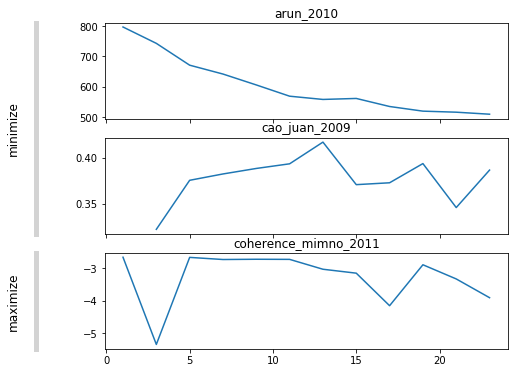

In [0]:
plot_eval_results(results_by_n_topics)

# **Topic Names and Classification**

In [0]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words
print(model_sm)
doc_topic = model_sm.doc_topic_
doc_labels = np.array(preproc_smaller.doc_labels)
topic_words = model_sm.topic_word_

doc_lengths_sm = doc_lengths(dtm_sm)

print(len(doc_topic))
print(len(doc_lengths_sm))

# remove 'uncommon words' preprocessing
topic_labels = generate_topic_labels_from_top_words(
    topic_words,
    doc_topic,
    doc_lengths_sm,
    vocab_sm,
    lambda_=.1
)

documentclassifications = ldamodel_top_doc_topics(doc_topic, doc_labels, top_n=2, topic_labels=topic_labels)

for index,arrow in documentclassifications.iterrows():
  documentclassifications.set_value(index, 'text', corpus[index])

27081
27081


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('gift')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
["As a Christmas gift for my friend, I ordered a Men's size 8; oops, too small!  After I paid $9.76 to ship it back to exchange for a size 9, the vendor sends me a refund.  I had to re-order the sandal from another vendor and pay $10 more for the sandal.  I received the Men's size 9 one week later than promised (I guess it rode around on the UPS truck for a week before it was finally delivered).  So what, just happy to finally to receive this long awaited gift and give it to my friend.  Oh noooo!  the size 9 is still too small!  Now it is just sitting in my garage on the work bench.  Will have to find someone else to gift it to since it costs too much to ship back.  Oh well.", '18_gift (0.2145)']


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('like')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
['Comfortable.  Fits like I expected. A bit pricey but its worth it.  Product was just as it was described.  Great', '39_bra (0.2308)']


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('dislike')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
["I  would recommend this to all of mine friends.  I rate it a 5 star because it is very comfortable.  I didn't dislike anything about this sandal. It was for my father in law.", '11_feedback (0.3388)']


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('suggest')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
['These Sandals are lightweight & very comfortable.  They certainly run small, I definitely suggest to buy a size up! I am so grateful for all the reviews that suggested to buy a size up.  My husband wears a size 11 we bought a 12 and they fit perfect.  We will probably be buying another pair soon!', '2_half (0.3388)']


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('develope')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
["The Supernova Sequence 3 is a solid training shoe for those looking for stability. I bought these shoes expecting a narrow stability trainer, since I have long narrow feet, and knowing adidas' reputation making narrow shoes. These shoes have a very solid feel while running while offering decent cushioning. As expected they are narrow. As much as I like these shoes, on the downside I noticed my large toe becoming sore from pressing down in the shoe, and I developed a blister on the inside of the toe next to my big toe on the left foot and a blister on the tip of the toe next to the big toe on the right foot. Additionally, the arches on both feet became strained and developed minor blisters as well. Finally, I experienced sweaty feet - which I normally don't experience - while wearing these shoes, which may have contributed to the blisters. With all that being said I feel like it is too soon to say weather I would recommend these shoes to anyone. My initial impression of the s

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
documentclassifications.to_excel('drive/My Drive/Colab Notebooks/APRD6343_NEW/topic.documentclassificationnew2.xlsx')

Mounted at /content/drive
